<a href="https://colab.research.google.com/github/MuhammadAbdullah80/Velocity-Solutions/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Glasses Detection in Images using Haarcascade



In this step, we implemented a glasses detection system using classical computer vision techniques with OpenCV.

### 🎯 Objective:
To identify whether individuals in an image are wearing glasses, and visually mark them with a red bounding box.

---

### 🔍 How It Works:

1. **Face Detection**:
   - We used the `haarcascade_frontalface_default.xml` classifier to detect human faces in the image.
   - This returns rectangular regions where faces are likely present.

2. **Glasses Detection**:
   - For each detected face, we applied the `haarcascade_eye_tree_eyeglasses.xml` model.
   - This classifier is trained on detecting **eye regions with glasses**.
   - It doesn’t detect the full frame of the glasses, but the eye area influenced by the presence of glasses.

3. **Visual Improvement**:
   - By default, it returns two small rectangles (one for each eye).
   - We combined these into a **single larger red box** around the glasses area by calculating the outer bounds of both eye boxes.
   - Then we added padding around the box to simulate a full-glasses detection.

4. **Batch Processing**:
   - We looped over all image files in a folder (`sample_images/`) and automatically processed each one.

---

### ✅ Output:
- The total number of faces detected
- The number of people identified as **wearing glasses**
- Each detected glasses region is marked with a red rectangle

---

### 📌 Why Haarcascade?
While not as powerful as deep learning models, Haarcascade classifiers are lightweight and fast.  
Training a custom glasses detection model would require:
- A large labeled dataset
- Hours of training time
- Substantial compute resources

Hence, for this mini-project, we used the pre-trained Haarcascade approach as a **practical and efficient solution**.



In [28]:
import urllib.request

url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml"
urllib.request.urlretrieve(url, "haarcascade_eye_tree_eyeglasses.xml")

print("Downloaded successfully!")


Downloaded successfully!



🖼️ Processing: 4.webp
Total faces: 0
People wearing glasses: 0


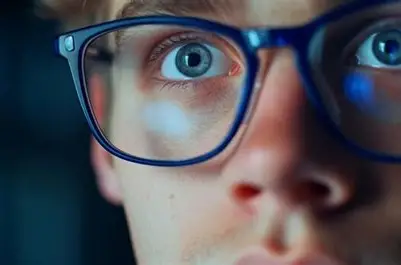


🖼️ Processing: 7.webp
Total faces: 1
People wearing glasses: 1


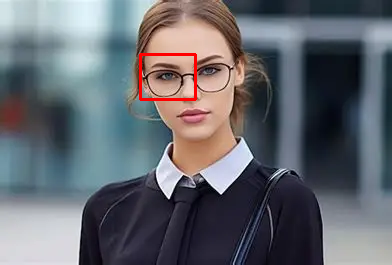


🖼️ Processing: 10.webp
Total faces: 1
People wearing glasses: 0


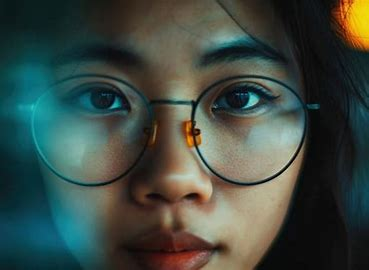


🖼️ Processing: 5.webp
Total faces: 1
People wearing glasses: 1


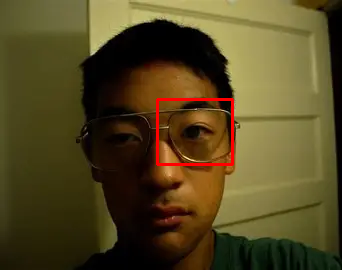


🖼️ Processing: 1.webp
Total faces: 5
People wearing glasses: 1


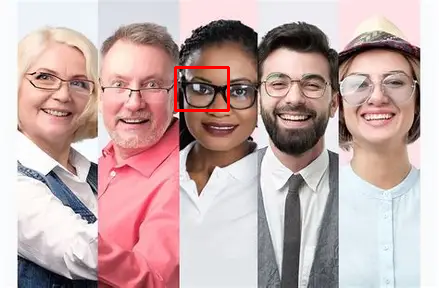


🖼️ Processing: 8.webp
Total faces: 1
People wearing glasses: 1


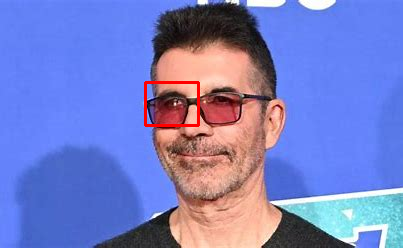


🖼️ Processing: 2.webp
Total faces: 1
People wearing glasses: 1


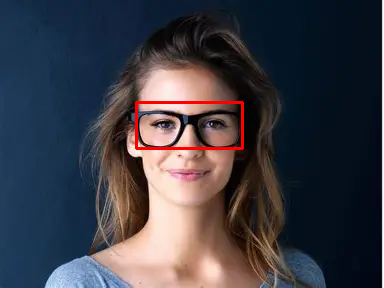


🖼️ Processing: 6.webp
Total faces: 0
People wearing glasses: 0


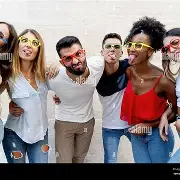


🖼️ Processing: 3.webp
Total faces: 1
People wearing glasses: 1


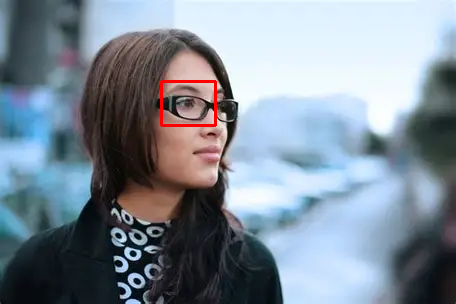


🖼️ Processing: 9.webp
Total faces: 0
People wearing glasses: 0


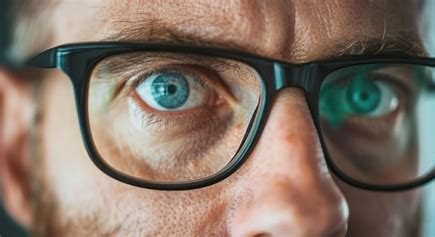

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Load classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
glasses_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

# Folder path containing images
folder_path = 'sample_images/'

# Get all image filenames
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

# Loop over all images
for file_name in image_files:
    print(f"\nProcessing: {file_name}")
    img_path = os.path.join(folder_path, file_name)

    img = cv2.imread(img_path)
    if img is None:
        print("Failed to load image. Skipping...")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    total_faces = len(faces)
    glasses_count = 0

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect glasses
        glasses = glasses_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=4)

        if len(glasses) > 0:
            glasses_count += 1

            x_min = min([gx for gx, _, _, _ in glasses])
            y_min = min([gy for _, gy, _, _ in glasses])
            x_max = max([gx + gw for gx, _, gw, _ in glasses])
            y_max = max([gy + gh for _, gy, _, gh in glasses])

            # Add padding
            padding_x = 15
            padding_y = 10

            x1 = max(0, x_min - padding_x)
            y1 = max(0, y_min - padding_y)
            x2 = min(roi_color.shape[1], x_max + padding_x)
            y2 = min(roi_color.shape[0], y_max + padding_y)

            # Draw red box
            cv2.rectangle(roi_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Print and display
    print(f"Total faces: {total_faces}")
    print(f"People wearing glasses: {glasses_count}")
    cv2_imshow(img)


# 🖼️ Upload & Detect Glasses




In this step, we allow users to upload a custom image containing people.  
The system detects faces and checks if each person is wearing glasses using Haarcascade classifiers.

- Draws a padded red box around detected glasses
- Prints the total number of people and those wearing glasses


In [ ]:
from google.colab import files
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Upload image
uploaded = files.upload()

# Get uploaded image filename
file_name = list(uploaded.keys())[0]
print("Image uploaded:", file_name)

# Read image
img = Image.open(file_name).convert('RGB')
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


Saving 2.webp to 2.webp
Image uploaded: 2.webp


Total faces detected: 1
People wearing glasses: 1


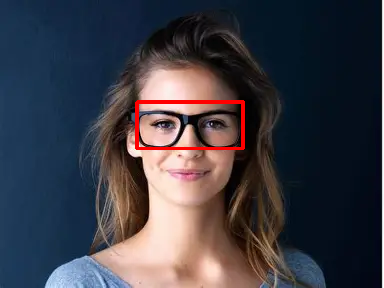

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
total_faces = len(faces)
glasses_count = 0

for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    glasses = glasses_cascade.detectMultiScale(roi_gray, 1.1, 4)

    if len(glasses) > 0:
        glasses_count += 1

        # Combine and pad box
        x_min = min([gx for gx, _, _, _ in glasses])
        y_min = min([gy for _, gy, _, _ in glasses])
        x_max = max([gx + gw for gx, _, gw, _ in glasses])
        y_max = max([gy + gh for _, gy, _, gh in glasses])

        padding_x = 15
        padding_y = 10

        x1 = max(0, x_min - padding_x)
        y1 = max(0, y_min - padding_y)
        x2 = min(roi_color.shape[1], x_max + padding_x)
        y2 = min(roi_color.shape[0], y_max + padding_y)

        # Draw red box
        cv2.rectangle(roi_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show results
print(f"Total faces detected: {total_faces}")
print(f"People wearing glasses: {glasses_count}")
cv2_imshow(img)


# 🎥 Real-Time Glasses Detection (Local Only)



This step uses your computer's webcam to detect whether a person is wearing glasses or not in real-time.

- Uses Haarcascade classifiers from OpenCV.
- Draws a red box around the glasses if detected.
- Displays a label: **"Wearing Glasses"** or **"No Glasses"**.
- Works **only locally**, not on Google Colab.

> 💡 Press `q` to quit the webcam window.


In [7]:
# this only works locally as we cannot access the webcam from the cloud
import cv2

# Load Haarcascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
glasses_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')  # Make sure this is in the same folder

# Start webcam
cap = cv2.VideoCapture(0)  # 0 = default camera

if not cap.isOpened():
    print("❌ Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Detect glasses (actually eye regions influenced by glasses)
        glasses = glasses_cascade.detectMultiScale(roi_gray, 1.1, 4)

        if len(glasses) > 0:
            # Combine all detected eye boxes into one padded box
            x_min = min([gx for gx, _, _, _ in glasses])
            y_min = min([gy for _, gy, _, _ in glasses])
            x_max = max([gx + gw for gx, _, gw, _ in glasses])
            y_max = max([gy + gh for _, gy, _, gh in glasses])

            # Add padding
            padding_x = 15
            padding_y = 20
            x1 = max(0, x_min - padding_x)
            y1 = max(0, y_min - padding_y)
            x2 = min(roi_color.shape[1], x_max + padding_x)
            y2 = min(roi_color.shape[0], y_max + padding_y)

            # Draw red box around glasses
            cv2.rectangle(roi_color, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(frame, "Wearing Glasses", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            cv2.putText(frame, "No Glasses", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Show the result in a window
    cv2.imshow('Real-Time Glasses Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


❌ Could not open webcam.
❌ Failed to grab frame.


error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



# 👓 Glasses Detection – CNN Model (Advanced)



We trained a Convolutional Neural Network (CNN) locally using the *"Glasses or No Glasses"* dataset. The dataset contains 5,000 labeled face images, with labels provided in `train.csv`.

- Images were loaded based on the `face-{id}.jpg` naming format.
- A custom image pipeline was created using TensorFlow and Pandas to load and label the data.
- An advanced CNN model was built with multiple Conv2D and MaxPooling layers for better accuracy.
- After training, the model was saved locally as `glasses_cnn_model.h5` for future use.

This trained model will now be used for predictions on new images and in real-time webcam applications.


In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

# Paths
CSV_PATH = r"A:\Velocity Solutions\Glasses\train.csv"
IMAGE_FOLDER = r"A:\Velocity Solutions\Glasses\faces-spring-2020\faces-spring-2020"

# Load CSV and prepare filenames
df = pd.read_csv(CSV_PATH)
df['filename'] = df['id'].apply(lambda x: f"face-{x}.png")  # changed to .jpg
df['label'] = df['glasses']  # 'glasses' column is the target

# Load and preprocess images
X, y = [], []
for idx, row in df.iterrows():
    image_path = os.path.join(IMAGE_FOLDER, row['filename'])
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, (100, 100))  # Resize to match model input
        X.append(img)
        y.append(row['label'])

X = np.array(X) / 255.0  # Normalize
y = np.array(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Advanced CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Save model
model.save("glasses_cnn_model.h5")
print("Model trained and saved as glasses_cnn_model.h5")


KeyboardInterrupt: 

#⚙️ Testing my Model

## 🧠 CNN-Controlled Glasses Detection with Red Box (Hybrid Approach)

In this step, we refined our glasses detection system by combining:

- 🔍 **Face & eye detection** using Haarcascade classifiers
- ✅ **Glasses classification** using our trained CNN model

### 🛠️ Key Logic:
- The **CNN model** is used to **decide whether glasses are being worn**.
- If the model predicts **"Wearing Glasses"**, we try to draw a **red rectangle** around the glasses using Haarcascade.
- If Haarcascade fails to detect glasses, we still show the label (since the model is the final decision-maker).
- If the model predicts **"No Glasses"**, a green "No Glasses" label is displayed without any box.

### ✅ Why this is better:
- Makes the system **less dependent on Haarcascade**, which is sometimes unreliable.
- Trusts the **CNN’s prediction** for presence of glasses.
- Improves robustness and **avoids mismatches** (where label says glasses but no box appears).

This step greatly improved the consistency of our results across different faces and lighting conditions.


In [20]:
!pip install tensorflow opencv-python


In [21]:
from google.colab import files

# Upload your model file
uploaded = files.upload()  # Upload `glasses_cnn_model.h5`


Saving glasses_cnn_model.h5 to glasses_cnn_model (1).h5


In [57]:
uploaded = files.upload()  # Upload a sample face image


Saving a.jpg to a.jpg
Saving b.jpg to b.jpg
Saving c.jpg to c.jpg
Saving d.jpg to d.jpg
Saving e.jpg to e.jpg
Saving f.jpg to f.jpg
Saving g.jpg to g.jpg
Saving h.jpg to h.jpg
Saving i.jpg to i.jpg


In [22]:
from tensorflow.keras.models import load_model

model = load_model("glasses_cnn_model.h5")
print("✅ Model Loaded")


✅ Model Loaded


In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(img_path, target_size=(100, 100)):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Could not read image!")
    original = img.copy()
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Make it (1, 100, 100, 3)
    return img, original


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


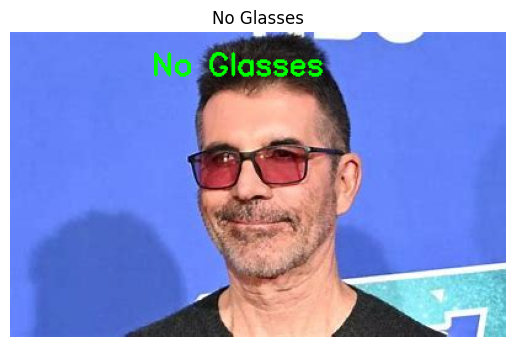

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


# --- Upload and process your image ---
image_path = "8.webp"  # Replace with your uploaded image name
processed_img, original_img = preprocess_image(image_path)
prediction = model.predict(processed_img)[0][0]
label = "Wearing Glasses" if prediction >= 0.5 else "No Glasses"

# --- Convert to grayscale for Haar detection ---
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = original_img[y:y+h, x:x+w]

    if prediction >= 0.5:
        # Model predicts glasses
        glasses = glasses_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=4)

        if len(glasses) > 0:
            # Glasses detected by Haarcascade
            gx_min = min([gx for gx, _, _, _ in glasses])
            gy_min = min([gy for _, gy, _, _ in glasses])
            gx_max = max([gx + gw for gx, _, gw, _ in glasses])
            gy_max = max([gy + gh for _, gy, _, gh in glasses])

            box_width = gx_max - gx_min
            box_height = gy_max - gy_min
            pad_x = int(0.2 * box_width)
            pad_y = int(0.4 * box_height)

            x1 = max(0, gx_min - pad_x)
            y1 = max(0, gy_min - pad_y)
            x2 = min(roi_color.shape[1], gx_max + pad_x)
            y2 = min(roi_color.shape[0], gy_max + pad_y)

            # Draw red box on detected glasses area
            cv2.rectangle(roi_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Show label regardless of Haar success
        cv2.putText(original_img, "Wearing Glasses", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    else:
        # Model predicts no glasses
        cv2.putText(original_img, "No Glasses", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


# Show final output
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(label)
plt.show()



# 🎥 Real-Time Glasses Detection (CNN Model)



This step uses your **locally trained CNN model** to detect glasses in real-time using your **computer's webcam**.

### ⚙️ What It Does:
- Loads your custom-trained model `glasses_cnn_model.h5`
- Uses OpenCV Haarcascade to detect **faces and eye regions**
- Classifies each face as:
  - ✅ **Wearing Glasses** (if prediction ≥ 0.5)
  - ❌ **No Glasses** (if prediction < 0.5)
- Draws a **red rectangle around the glasses** using Haarcascade (not the full face)
- Adds appropriate labels on the screen

### 🚫 Note:
- This app **only works locally**, not on Google Colab
- You must have:
  - `haarcascade_frontalface_default.xml` (automatically available via OpenCV)
  - `haarcascade_eye_tree_eyeglasses.xml` (in same folder as script)
  - OpenCV and TensorFlow installed

### 🖥️ Run Instructions:
- Run the Python script on your PC
- Make sure your webcam is enabled
- Press `q` to quit the window



In [84]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model and Haarcascade
model = load_model("glasses_cnn_model.h5")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
glasses_cascade = cv2.CascadeClassifier("haarcascade_eye_tree_eyeglasses.xml")

# Start webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_color = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]

        # Preprocess face for CNN prediction
        face_resized = cv2.resize(roi_color, (100, 100))
        face_array = np.expand_dims(face_resized / 255.0, axis=0)

        # Predict with CNN
        prediction = model.predict(face_array)[0][0]
        label = "Wearing Glasses" if prediction >= 0.5 else "No Glasses"

        if prediction >= 0.5:
            # Detect glasses with Haarcascade
            glasses = glasses_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=4)

            if len(glasses) > 0:
                # Combine all detected glasses boxes into one
                gx_min = min([gx for gx, _, _, _ in glasses])
                gy_min = min([gy for _, gy, _, _ in glasses])
                gx_max = max([gx + gw for gx, _, gw, _ in glasses])
                gy_max = max([gy + gh for _, gy, _, gh in glasses])

                # Dynamic padding
                pad_x = int(0.2 * (gx_max - gx_min))
                pad_y = int(0.4 * (gy_max - gy_min))

                x1 = max(0, gx_min - pad_x)
                y1 = max(0, gy_min - pad_y)
                x2 = min(roi_color.shape[1], gx_max + pad_x)
                y2 = min(roi_color.shape[0], gy_max + pad_y)

                # Draw red rectangle
                cv2.rectangle(roi_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Draw label above face
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255) if prediction >= 0.5 else (0, 255, 0), 2)

    # Show frame
    cv2.imshow("Real-Time Glasses Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release
cap.release()
cv2.destroyAllWindows()


❌ Could not open webcam.
❌ Failed to grab frame.


error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
